In [9]:
pip install -r /app/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install /app/wheels/frame_extractors-0.1.0-py3-none-any.whl --force-reinstall

Processing /app/wheels/frame_extractors-0.1.0-py3-none-any.whl
  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: python-dateutil
    Found existing installation: pyth

In [11]:
import pandas as pd

from frame_extractors.dataframe import spliter
from frame_extractors.dataframe.preheader import DownRight
from frame_extractors.extractor import Processor

In [12]:
tables = ["/app/data/Table#1.xlsx"]
test = sum(
    [list(pd.read_excel(t, sheet_name=None, header=None).values()) for t in tables], []
)

In [13]:
out = Processor(
    [
        spliter.RowSpaceSpliter(2),
        spliter.PaddingRemover(),
        spliter.AutoHeader(DownRight("\d{4}[-/]\d{2}", ["Zip", "Sq. Ft."])),
        spliter.ColumnClean(),
        spliter.Footer(["TOTAL"]),
        spliter.IndexSet(["NAME", "CITY"]),
        spliter.HeaderDataExtractor(
            "SEASON",
            {
                "2020 21": 2020,
                "2021 22": 2021,
                "2022 23": 2022,
                "2023 24": 2023,
            },
        ),
        spliter.ColumnClean(),
    ]
)(test)

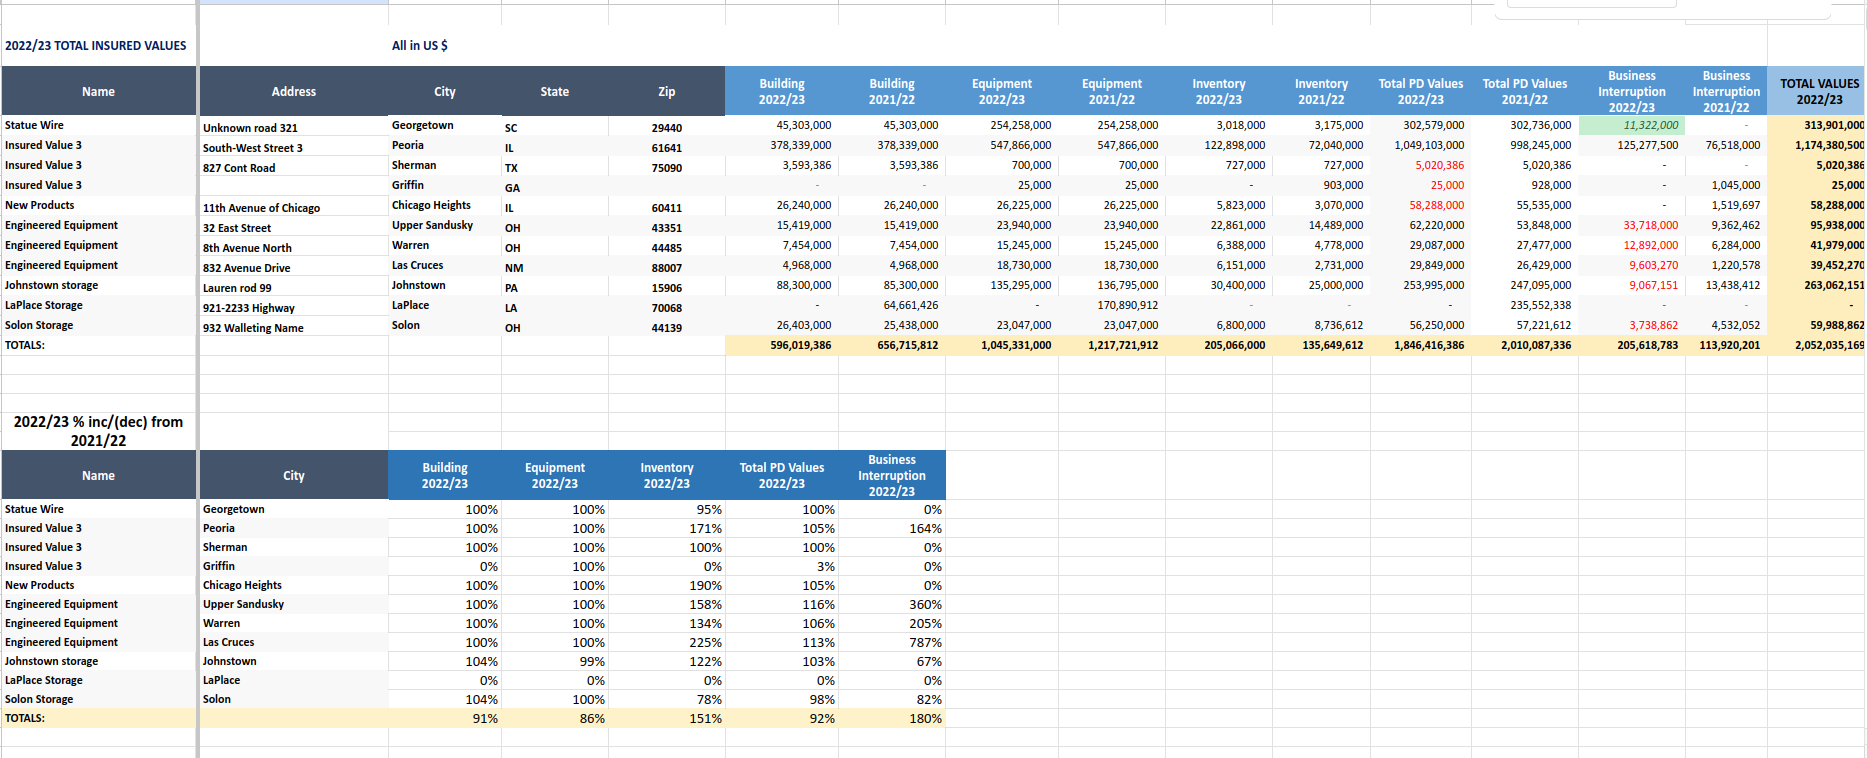

In [18]:
from IPython.display import Image

Image(filename="/app/demo_images/first_2_tables.png")

In [15]:
out[0]

ADDRESS STATE    ZIP  \
NAME                 CITY                                                   
Statue Wire          Georgetown             Unknown road 321    SC  29440   
Insured Value 3      Peoria              South-West Street 3    IL  61641   
                     Sherman                   827 Cont Road    TX  75090   
                     Griffin                             NaN    GA    NaN   
New Products         Chicago Heights  11th Avenue of Chicago    IL  60411   
Engineered Equipment Upper Sandusky           32 East Street    OH  43351   
                     Warren                 8th Avenue North    OH  44485   
                     Las Cruces             832 Avenue Drive    NM  88007   
Johnstown storage    Johnstown                 Lauren rod 99    PA  15906   
LaPlace Storage      LaPlace                921-2233 Highway    LA  70068   
Solon Storage        Solon                932 Walleting Name    OH  44139   
Statue Wire          Georgetown             Unknown road 321    SC  29440   
Insured Value 3      Peoria              South-West Street 3    IL  61641   
                     Sherman                   827 Cont Road    TX  75090   
                     Griffin                             NaN    GA    NaN   
New Products         Chicago Heights  11th Avenue of Chicago    IL  60411   
Engineered Equipment Upper Sandusky           32 East Street    OH  43351   
                     Warren                 8th Avenue North    OH  44485   
                     Las Cruces             832 Avenue Drive    NM  88007   
Johnstown storage    Johnstown                 Lauren rod 99    PA  15906   
LaPlace Storage      LaPlace                921-2233 Highway    LA  70068   
Solon Storage        Solon                932 Walleting Name    OH  44139   

                                       BUILDING  EQUIPMENT  INVENTORY  \
NAME                 CITY                                               
Statue Wire          Georgetown        45303000  254258000    3175000   
Insured Value 3      Peoria           378339000  547866000   72040000   
                     Sherman            3593386     700000     727000   
                     Griffin                  0      25000     903000   
New Products         Chicago Heights   26240000   26225000    3070000   
Engineered Equipment Upper Sandusky    15419000   23940000   14489000   
                     Warren             7454000   15245000    4778000   
                     Las Cruces         4968000   18730000    2731000   
Johnstown storage    Johnstown         85300000  136795000   25000000   
LaPlace Storage      LaPlace           64661426  170890912          0   
Solon Storage        Solon             25438000   23047000    8736612   
Statue Wire          Georgetown        45303000  254258000    3018000   
Insured Value 3      Peoria           378339000  547866000  122898000   
                     Sherman            3593386     700000     727000   
                     Griffin                  0      25000          0   
New Products         Chicago Heights   26240000   26225000    5823000   
Engineered Equipment Upper Sandusky    15419000   23940000   22861000   
                     Warren             7454000   15245000    6388000   
                     Las Cruces         4968000   18730000    6151000   
Johnstown storage    Johnstown         88300000  135295000   30400000   
LaPlace Storage      LaPlace                  0          0          0   
Solon Storage        Solon             26403000   23047000    6800000   

                                     TOTAL PD VALUES BUSINESS INTERRUPTION  \
NAME                 CITY                                                    
Statue Wire          Georgetown            302736000                     0   
Insured Value 3      Peoria                998245000              76518000   
                     Sherman                 5020386                     0   
                     Griffin                  928000         

In [16]:
out[1]

BUILDING EQUIPMENT INVENTORY  \
NAME                 CITY                                            
Statue Wire          Georgetown              1         1  0.950551   
Insured Value 3      Peoria                  1         1  1.705969   
                     Sherman                 1         1         1   
                     Griffin                 0         1         0   
New Products         Chicago Heights         1         1  1.896743   
Engineered Equipment Upper Sandusky          1         1  1.577818   
                     Warren                  1         1  1.336961   
                     Las Cruces              1         1  2.252289   
Johnstown storage    Johnstown         1.03517  0.989035     1.216   
LaPlace Storage      LaPlace                 0         0         0   
Solon Storage        Solon            1.037935         1  0.778334   

                                     TOTAL PD VALUES BUSINESS INTERRUPTION  \
NAME                 CITY                                                    
Statue Wire          Georgetown             0.999481                     0   
Insured Value 3      Peoria                 1.050947              1.637229   
                     Sherman                       1                     0   
                     Griffin                 0.02694                     0   
New Products         Chicago Heights        1.049572                     0   
Engineered Equipment Upper Sandusky         1.155475              3.601403   
                     Warren                 1.058594               2.05156   
                     Las Cruces             1.129403              7.867805   
Johnstown storage    Johnstown              1.027924              0.674719   
LaPlace Storage      LaPlace                       0                     0   
Solon Storage        Solon                   0.98302              0.824982   

                                      SEASON  
NAME                 CITY                     
Statue Wire          Georgetown         2022  
Insured Value 3      Peoria             2022  
                     Sherman            2022  
                     Griffin            2022  
New Products         Chicago Heights    2022  
Engineered Equipment Upper Sandusky     2022  
                     Warren             2022  
                     Las Cruces         2022  
Johnstown storage    Johnstown          2022  
LaPlace Storage      LaPlace            2022  
Solon Storage        Solon              2022

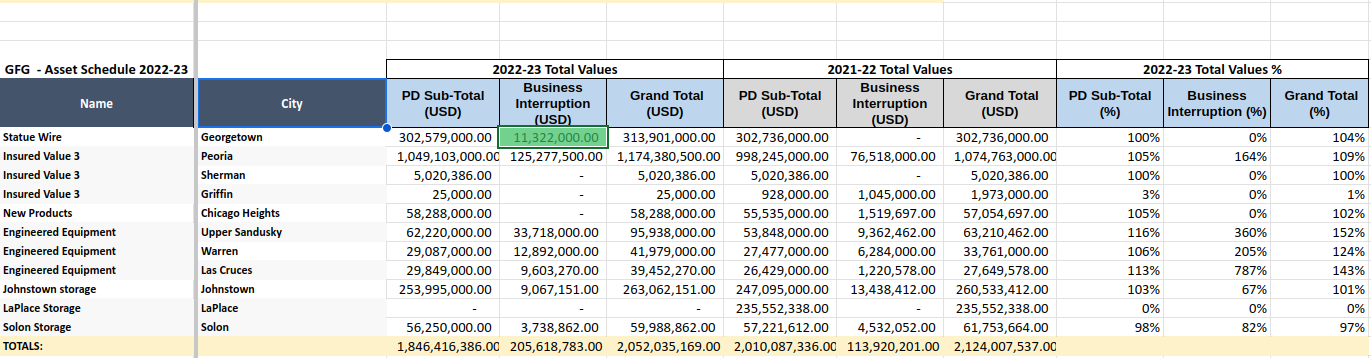

In [17]:
Image(filename="/app/demo_images/3rdtable.png")

In [20]:
out[2]

PD SUB TOTAL USD  \
NAME                 CITY                               
Statue Wire          Georgetown             302736000   
Insured Value 3      Peoria                 998245000   
                     Sherman                  5020386   
                     Griffin                   928000   
New Products         Chicago Heights         55535000   
Engineered Equipment Upper Sandusky          53848000   
                     Warren                  27477000   
                     Las Cruces              26429000   
Johnstown storage    Johnstown              247095000   
LaPlace Storage      LaPlace                235552338   
Solon Storage        Solon                   57221612   
Statue Wire          Georgetown             302579000   
Insured Value 3      Peoria                1049103000   
                     Sherman                  5020386   
                     Griffin                    25000   
New Products         Chicago Heights         58288000   
Engineered Equipment Upper Sandusky          62220000   
                     Warren                  29087000   
                     Las Cruces              29849000   
Johnstown storage    Johnstown              253995000   
LaPlace Storage      LaPlace                        0   
Solon Storage        Solon                   56250000   

                                     BUSINESS INTERRUPTION USD  \
NAME                 CITY                                        
Statue Wire          Georgetown                              0   
Insured Value 3      Peoria                           76518000   
                     Sherman                                 0   
                     Griffin                           1045000   
New Products         Chicago Heights                   1519697   
Engineered Equipment Upper Sandusky                    9362462   
                     Warren                            6284000   
                     Las Cruces                        1220578   
Johnstown storage    Johnstown                        13438412   
LaPlace Storage      LaPlace                                 0   
Solon Storage        Solon                             4532052   
Statue Wire          Georgetown                       11322000   
Insured Value 3      Peoria                          125277500   
                     Sherman                                 0   
                     Griffin                                 0   
New Products         Chicago Heights                         0   
Engineered Equipment Upper Sandusky                   33718000   
                     Warren                           12892000   
                     Las Cruces                        9603270   
Johnstown storage    Johnstown                         9067151   
LaPlace Storage      LaPlace                                 0   
Solon Storage        Solon                             3738862   

                                     GRAND TOTAL USD  SEASON PD SUB TOTAL %  \
NAME                 CITY                                                     
Statue Wire          Georgetown            302736000    2021            NaN   
Insured Value 3      Peoria               1074763000    2021            NaN   
                     Sherman                 5020386    2021            NaN   
                     Griffin                 1973000    2021            NaN   
New Products         Chicago Heights        57054697    2021            NaN   
Engineered Equipment Upper Sandusky         63210462    2021            NaN   
                     Warren                 33761000    2021            NaN   
                     Las Cruces             27649578    2021            NaN   
Johnstown storage    Johnstown             260533412    2021            NaN   
LaPlace Storage      LaPlace               235552338    2021            NaN   
Solon Storage        Solon                  61753664    2021            NaN   
Statue Wire          Georgetown            313901000    